In [166]:
import numpy as np

#Constant
LIMIT = 100 #maximum of iterations
xmin = 0.0
xmax = 2.0
ymin = 0.0
ymax = 1.0
N = 100
M = 100
dx = (xmax-xmin)/N
dy = (ymax-ymin)/M

#Non-homogeneous terms
def f(x,y):
   return np.sin(1.5*np.pi*x)*np.sin(np.pi*y)

#function of iteration
def iteration(u):
    u_next = [[0 for i in range(N)] for j in range(M)]  #next step:uij
    for i in range(1, N - 1):
        for j in range(1, M - 1):
            u_next[i][j] = (u[i][j - 1] + u[i - 1][j] + u[i + 1][j]
                            + u[i][j + 1] - (dx**2)*f(i*dx,j*dy)) / 4

    #update for uij
    for i in range(1, N - 1):
        for j in range(1, M - 1):
            u[i][j] = u_next[i][j]

#main
u = [[0 for i in range(N)] for j in range(M)]  #reset uij

for i in range(LIMIT):
    iteration(u)

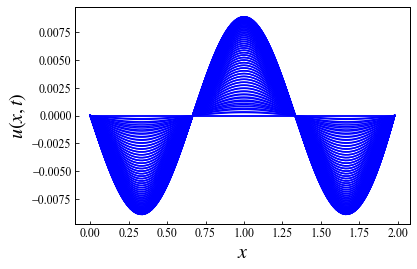

In [174]:
import matplotlib.pyplot as plt

#Plot
X = np.arange(xmin, xmax, dx)
fig = plt.figure()
fig_1 = fig.add_subplot(111)
fig_1.plot(X,u,color="b")

plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 20 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 12 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 12 # 軸だけ変更されます
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width
plt.rcParams['axes.grid'] = False # make grid
fig_1.set_xlabel(r"$x$")
fig_1.set_ylabel(r"$u(x,t)$")
plt.show()

#Save
fig.savefig('poisson_ux-plane.eps', bbox_inches="tight", pad_inches=0.05)

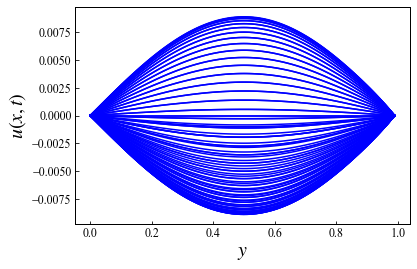

In [175]:
import matplotlib.pyplot as plt

#Plot
Y = np.arange(ymin, ymax, dy)
fig = plt.figure()
fig_1 = fig.add_subplot(111)
for i in range(M):
    fig_1.plot(Y,u[i],color="b")

plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 20 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 12 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 12 # 軸だけ変更されます
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width
plt.rcParams['axes.grid'] = False # make grid

fig_1.set_xlabel(r"$y$")
fig_1.set_ylabel(r"$u(x,t)$")
plt.show()

#Save
fig.savefig('poisson_uy-plane.eps', bbox_inches="tight", pad_inches=0.05)

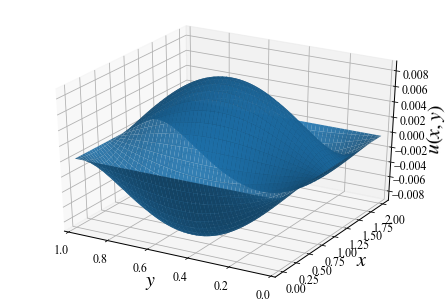

In [173]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#3D Plot
x = np.arange(xmin, xmax, dx)
y = np.arange(ymin, ymax, dy)
X, Y = np.meshgrid(y, x)
fig = plt.figure()
ax = Axes3D(fig)
U = np.array(u)
ax.plot_surface(X, Y, U, alpha = 0.9)
ax.set_xlim([ymax, ymin])
ax.set_xlabel(r"$y$")
ax.set_ylabel(r"$x$")
ax.set_zlabel(r"$u(x,y)$")
plt.show()
#Save
fig.savefig('poisson.eps', bbox_inches="tight", pad_inches=0.05)